# Исследование рекламных показателей приложения Procrastinate Pro+

В нашем распоряжении есть данные о пользователях, привлечённых в приложение Procrastinate Pro+ с 1 мая по 27 октября 2019 года: 
- лог сервера с данными об их посещениях,
- выгрузка их покупок за этот период,
- рекламные расходы.

Несмотря на огромные вложения в рекламу, последние несколько месяцев компания терпит убытки. 

**Цель данного исследования** — разобраться в причинах и помочь компании выйти в плюс.

**В ходе исследования нам предстоит изучить:**
* откуда приходят пользователи и какими устройствами они пользуются,
* сколько стоит привлечение пользователей из различных рекламных каналов;
* сколько денег приносит каждый клиент,
* когда расходы на привлечение клиента окупаются,
* какие факторы мешают привлечению клиентов.


**План проекта:**

1. [Загрузка и предобработка данных](#Загрузка-и-предобработка-данных)
    1. [Загрузка данных](#Загрузка-данных)
    2. [Обработка пропусков и дубликатов](#Обработка-пропусков-и-дубликатов)
    3. [Переименование столбцов](#Переименование-столбцов)
    4. [Изменение типов данных](#Изменение-типов-данных)
    5. [Вывод](#Вывод)
2. [Функции для расчёта и анализа LTV, ROI, удержания и конверсии](#Функции-для-расчёта-и-анализа-LTV,-ROI,-удержания-и-конверсии)
3. [Исследовательский анализ данных](#Исследовательский-анализ-данных)
    1. [Профили пользователей](#Профили-пользователей)
    2. [Доля платящих по странам](#Доля-платящих-по-странам)
    3. [Доля платящих по устройствам](#Доля-платящих-по-устройствам)
    4. [Доля платящих по рекламным источникам](#Доля-платящих-по-рекламным-источникам)
    5. [Вывод](#Вывод)
4. [Маркетинг](#Маркетинг)
    1. [Сумма расходов на маркетинг по рекламным источникам](#Сумма-расходов-на-маркетинг-по-рекламным-источникам)
    2. [Затраты на рекламу по времени](#Затраты-на-рекламу-по-времени)
    3. [Стоимость привлечения одного пользователя](#Стоимость-привлечения-одного-пользователя)
    4. [Вывод](#Вывод)
5. [Оценка окупаемости рекламы](#Оценка-окупаемости-рекламы)
    1. [Общая окупаемость](#Общая-окупаемость)
    2. [Удержание и конверсия](#Удержание-и-конверсия)
    3. [Окупаемость с разбивкой по устройствам](#Окупаемость-с-разбивкой-по-устройствам)
    4. [Окупаемость с разбивкой по регионам](#Окупаемость-с-разбивкой-по-регионам)
    5. [Окупаемость с разбивкой по каналу привлечения](#Окупаемость-с-разбивкой-по-каналу-привлечения)
    6. [Вывод](#Вывод)
6. [Общие выводы и рекомендации](#Общие-выводы-и-рекомендации)

## Загрузка и предобработка данных

### Загрузка данных

In [1]:
# Импортируем библиотеки
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
from matplotlib import pyplot as plt

In [2]:
# Загружаем датасеты
visits = pd.read_csv(r'C:\Users\ivank\practicum\datasets\visits_info_short.csv')
orders = pd.read_csv(r'C:\Users\ivank\practicum\datasets\orders_info_short.csv')
costs = pd.read_csv(r'C:\Users\ivank\practicum\datasets\costs_info_short.csv')

In [3]:
display(visits.head())
visits.info()

,User Id,Region,Device,Channel,Session Start,Session End
0,981449118918,United States,iPhone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01
1,278965908054,United States,iPhone,organic,2019-05-01 04:46:31,2019-05-01 04:47:35
2,590706206550,United States,Mac,organic,2019-05-01 14:09:25,2019-05-01 15:32:08
3,326433527971,United States,Android,TipTop,2019-05-01 00:29:59,2019-05-01 00:54:25
4,349773784594,United States,Mac,organic,2019-05-01 03:33:35,2019-05-01 03:57:40


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   User Id        309901 non-null  int64 
 1   Region         309901 non-null  object
 2   Device         309901 non-null  object
 3   Channel        309901 non-null  object
 4   Session Start  309901 non-null  object
 5   Session End    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB


Таблица `visits` состоит из 309901 строк и 6 столбцов:

* `User Id` — уникальный идентификатор пользователя,
* `Region` — страна пользователя,
* `Device` — тип устройства пользователя,
* `Channel` — идентификатор источника перехода,
* `Session Start` — дата и время начала сессии,
* `Session End` — дата и время окончания сессии.

По информации о датасете можно увидеть, что для определенных столбцов определен неверный тип данных, а также некорректно названы столбцы. Пропусков, на первый взгляд, в таблице нет.

In [4]:
display(orders.head())
orders.info()

,User Id,Event Dt,Revenue
0,188246423999,2019-05-01 23:09:52,4.99
1,174361394180,2019-05-01 12:24:04,4.99
2,529610067795,2019-05-01 11:34:04,4.99
3,319939546352,2019-05-01 15:34:40,4.99
4,366000285810,2019-05-01 13:59:51,4.99


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   User Id   40212 non-null  int64  
 1   Event Dt  40212 non-null  object 
 2   Revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB


Таблица `orders` состоит из 40212 строк и 3 столбцов:

* `User Id` — уникальный идентификатор пользователя,
* `Event Dt` — дата и время покупки,
* `Revenue` — сумма заказа.

В данной таблице также некорректны названия столбцов и неверный тип данных в столбце с датой.

In [5]:
display(costs.head())
costs.info()

,dt,Channel,costs
0,2019-05-01,FaceBoom,113.3
1,2019-05-02,FaceBoom,78.1
2,2019-05-03,FaceBoom,85.8
3,2019-05-04,FaceBoom,136.4
4,2019-05-05,FaceBoom,122.1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   Channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


Таблица `costs` состоит из 1800 строк и 3 столбцов:
    
* `dt` — дата проведения рекламной кампании,
* `Channel` — идентификатор рекламного источника,
* `costs` — расходы на эту кампанию.

Данные загружены, внешне таблицы выглядят корректно, за исключением названий столбцов и типом данных. Сперва проверим, есть ли в датафреймах пропуски или строки-дубликаты.

### Обработка пропусков и дубликатов

In [6]:
print('Количество пропусков в таблице "visits":\n', visits.isna().sum())
print()
print('Количество пропусков в таблице "orders":\n', orders.isna().sum())
print()
print('Количество пропусков в таблице "costs":\n', costs.isna().sum())

Количество пропусков в таблице "visits":
 User Id          0
Region           0
Device           0
Channel          0
Session Start    0
Session End      0
dtype: int64

Количество пропусков в таблице "orders":
 User Id     0
Event Dt    0
Revenue     0
dtype: int64

Количество пропусков в таблице "costs":
 dt         0
Channel    0
costs      0
dtype: int64


Как видно по результату, пропусков в таблице нет, проверим как обстоят дела с дубликатами.

In [7]:
print('Количество дубликатов в таблице "visits":', visits.duplicated().sum())
print('Количество дубликатов в таблице "orders":', orders.duplicated().sum())
print('Количество дубликатов в таблице "costs":', costs.duplicated().sum())

Количество дубликатов в таблице "visits": 0
Количество дубликатов в таблице "orders": 0
Количество дубликатов в таблице "costs": 0


В данных также не оказалось дубликатов. Приступим к следующему этапу предобработки.

### Переименование столбцов

При выгрузке данных было видно, что названия столбцов выглядели некорректно: слова были разделены пробелами, написаны в разном регистре. 

In [8]:
visits.columns = visits.columns.str.lower().str.replace(' ', '_')
orders.columns = orders.columns.str.lower().str.replace(' ', '_')
costs.columns = costs.columns.str.lower()

Столбцы успешно переименованы. Теперь слова разделены нижним подчеркиванием, все столбцы приведены к нижнему регистру.

### Изменение типов данных

С помощью `.info()` проверим, корректно ли отображаются новые названия столбцов, и правильно ли определен тип данных.

In [9]:
visits.info()
print()
orders.info()
print()
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   user_id        309901 non-null  int64 
 1   region         309901 non-null  object
 2   device         309901 non-null  object
 3   channel        309901 non-null  object
 4   session_start  309901 non-null  object
 5   session_end    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   40212 non-null  int64  
 1   event_dt  40212 non-null  object 
 2   revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column 

Теперь названия столбцов выглядят правильно, однако не везде выбран правильный тип данных в датафрейме. Приведем столбцы к типу данных `datetime`.

In [10]:
visits['session_start'] = pd.to_datetime(visits['session_start'])
visits['session_end'] = pd.to_datetime(visits['session_end'])

orders['event_dt'] = pd.to_datetime(orders['event_dt'])

costs['dt'] = pd.to_datetime(costs['dt']).dt.date

In [11]:
display(visits.head(3))
display(orders.head(3))
display(costs.head(3))

,user_id,region,device,channel,session_start,session_end
0,981449118918,United States,iPhone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01
1,278965908054,United States,iPhone,organic,2019-05-01 04:46:31,2019-05-01 04:47:35
2,590706206550,United States,Mac,organic,2019-05-01 14:09:25,2019-05-01 15:32:08


,user_id,event_dt,revenue
0,188246423999,2019-05-01 23:09:52,4.99
1,174361394180,2019-05-01 12:24:04,4.99
2,529610067795,2019-05-01 11:34:04,4.99


,dt,channel,costs
0,2019-05-01,FaceBoom,113.3
1,2019-05-02,FaceBoom,78.1
2,2019-05-03,FaceBoom,85.8


После полной обработки данных, проверим числовые показатели таблиц `orders` и `costs`.

In [12]:
display(orders.drop(columns='user_id').describe().round(2))
display(costs.describe().round(2))

,revenue
count,40212.00
mean,5.37
std,3.45
min,4.99
25%,4.99
50%,4.99
75%,4.99
max,49.99


,costs
count,1800.00
mean,58.61
std,107.74
min,0.80
25%,6.50
50%,12.29
75%,33.60
max,630.00


Столбец `revenue` из таблицы `orders` выглядит нормально. Видно, что более 75% сумм заказа составляли 4,99. Вероятно, это стоимость подписки на приложение за месяц, а максимальная сумма заказа в 49,99 может быть стоимостью подписки за год.

В столбце `costs` из одноименной таблицы, должно быть, много выбросов, крупных расходов на рекламную кампанию, о чем говорит высокий уровень стандартного отклонения.

На данном этапе вся необходимая предобработка выполнена, пропуски и дубликаты в данных не были обнаружены, столбцы были переименованы, типы данных измененына корректные. Можно приступать к следующему шагу.

[Начало страницы](#Исследование-рекламных-показателей-приложения-Procrastinate-Pro+)

## Функции для расчёта и анализа LTV, ROI, удержания и конверсии

Функции для вычисления значений метрик:

- `get_profiles()` — для создания профилей пользователей,
- `get_retention()` — для подсчёта Retention Rate,
- `get_conversion()` — для подсчёта конверсии,
- `get_ltv()` — для подсчёта LTV.

In [13]:
# функция для создания пользовательских профилей
def get_profiles(sessions, orders, ad_costs):

    # находим параметры первых посещений
    profiles = (
        sessions.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()
    )

    # для когортного анализа определяем дату первого посещения
    # и первый день месяца, в который это посещение произошло
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')

    # добавляем признак платящих пользователей
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())

    # считаем количество уникальных пользователей
    # с одинаковыми источником и датой привлечения
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()
    )

    # объединяем траты на рекламу и число привлечённых пользователей
    ad_costs = ad_costs.merge(new_users, on=['dt', 'channel'], how='left')

    # делим рекламные расходы на число привлечённых пользователей
    ad_costs['acquisition_cost'] = ad_costs['costs'] / ad_costs['unique_users']

    # добавляем стоимость привлечения в профили
    profiles = profiles.merge(
        ad_costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )

    # стоимость привлечения органических пользователей равна нулю
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)

    return profiles

In [14]:
# функция для расчёта удержания

def get_retention(
    profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # добавляем столбец payer в передаваемый dimensions список
    dimensions = ['payer'] + dimensions

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        sessions[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу удержания
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # получаем таблицу динамики удержания
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time 

In [15]:
# функция для расчёта конверсии

def get_conversion(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # определяем дату и время первой покупки для каждого пользователя
    first_purchases = (
        purchases.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    # рассчитываем лайфтайм для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users' 
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis = 1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # делим каждую «ячейку» в строке на размер когорты
        # и получаем conversion rate
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # для таблицы динамики конверсии убираем 'cohort' из dimensions
    if 'cohort' in dimensions: 
        dimensions = []

    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time 

In [16]:
# функция для расчёта LTV и ROI

def get_ltv(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        purchases[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    # рассчитываем лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days
    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция группировки по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # строим «треугольную» таблицу выручки
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        # находим сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)
        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # объединяем размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # считаем LTV: делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes

        # собираем датафрейм с данными пользователей и значениями CAC, 
        # добавляя параметры из dimensions
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        # считаем средний CAC по параметрам из dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        # считаем ROI: делим LTV на CAC
        roi = result.div(cac['cac'], axis=0)

        # удаляем строки с бесконечным ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # восстанавливаем размеры когорт в таблице ROI
        roi['cohort_size'] = cohort_sizes

        # добавляем CAC в таблицу ROI
        roi['cac'] = cac['cac']

        # в финальной таблице оставляем размеры когорт, CAC
        # и ROI в лайфтаймы, не превышающие горизонт анализа
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # возвращаем таблицы LTV и ROI
        return result, roi

    # получаем таблицы LTV и ROI
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    # для таблиц динамики убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицы динамики LTV и ROI
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    ) 

А также функции для построения графиков:

- `filter_data()` — для сглаживания данных,
- `plot_retention()` — для построения графика Retention Rate,
- `plot_conversion()` — для построения графика конверсии,
- `plot_ltv_roi` — для визуализации LTV и ROI.

In [17]:
# функция для сглаживания фрейма

def filter_data(df, window):
    # для каждого столбца применяем скользящее среднее
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df 

In [18]:
# функция для визуализации удержания

def plot_retention(retention, retention_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 10))

    # исключаем размеры когорт и удержание первого дня
    retention = retention.drop(columns=['cohort_size', 0])
    # в таблице динамики оставляем только нужный лайфтайм
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # если в индексах таблицы удержания только payer,
    # добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # в таблице графиков — два столбца и две строки, четыре ячейки
    # в первой строим кривые удержания платящих пользователей
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

    # во второй ячейке строим кривые удержания неплатящих
    # вертикальная ось — от графика из первой ячейки
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')

    # в третьей ячейке — динамика удержания платящих
    ax3 = plt.subplot(2, 2, 3)
    # получаем названия столбцов для сводной таблицы
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания платящих пользователей на {}-й день'.format(
            horizon
        )
    )

    # в чётвертой ячейке — динамика удержания неплатящих
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания неплатящих пользователей на {}-й день'.format(
            horizon
        )
    )
    
    plt.tight_layout()
    plt.show() 

In [19]:
def plot_conversion(conversion, conversion_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 5))

    # исключаем размеры когорт
    conversion = conversion.drop(columns=['cohort_size'])
    # в таблице динамики оставляем только нужный лайфтайм
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # первый график — кривые конверсии
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    # второй график — динамика конверсии
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # столбцами сводной таблицы станут все столбцы индекса, кроме даты
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show() 

In [20]:
def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):

    # задаём сетку отрисовки графиков
    plt.figure(figsize=(20, 10))

    # из таблицы ltv исключаем размеры когорт
    ltv = ltv.drop(columns=['cohort_size'])
    # в таблице динамики ltv оставляем только нужный лайфтайм
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # стоимость привлечения запишем в отдельный фрейм
    cac_history = roi_history[['cac']]

    # из таблицы roi исключаем размеры когорт и cac
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # в таблице динамики roi оставляем только нужный лайфтайм
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # первый график — кривые ltv
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    # второй график — динамика ltv
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    # третий график — динамика cac
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    # четвёртый график — кривые roi
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    # пятый график — динамика roi
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show() 

С данными функциями можем переходить к анализу данных.

[Начало страницы](#Исследование-рекламных-показателей-приложения-Procrastinate-Pro+)

## Исследовательский анализ данных

### Профили пользователей

Составим профили пользователей и определим минимальную и макимальную даты привлечения пользователей.

In [21]:
profiles = get_profiles(visits, orders, costs)
profiles.head(5)

,user_id,first_ts,channel,device,region,dt,month,payer,acquisition_cost
0,599326,2019-05-07 20:58:57,FaceBoom,Mac,United States,2019-05-07,2019-05-01,True,1.088172
1,4919697,2019-07-09 12:46:07,FaceBoom,iPhone,United States,2019-07-09,2019-07-01,False,1.107237
2,6085896,2019-10-01 09:58:33,organic,iPhone,France,2019-10-01,2019-10-01,False,0.000000
3,22593348,2019-08-22 21:35:48,AdNonSense,PC,Germany,2019-08-22,2019-08-01,False,0.988235
4,31989216,2019-10-02 00:07:44,YRabbit,iPhone,United States,2019-10-02,2019-10-01,False,0.230769


In [22]:
# Проверим даты на соответствие ТЗ
min_date = profiles['dt'].min()
max_date = profiles['dt'].max()

print('Минимальная дата привлечения пользователей -', min_date)
print('Максимальная дата привлечения пользователей -', max_date)

Минимальная дата привлечения пользователей - 2019-05-01
Максимальная дата привлечения пользователей - 2019-10-27


Профили составлены, даты определены. Судя по датам, в датафреймах присутствуют данные почти за 6 месяцев, с 1 мая по 27 октября 2019 года. Данные даты соответствуют заданным в описании к исследованию.

### Доля платящих по странам

Посмотрим, данные по каким странам присутствуют в датафреймах и как распределялось количество пользоваталей и доля платящих по каждой из стран. Отсортируем таблицу по убыванию доли платящих клиентов.

In [23]:
region = profiles.pivot_table(
    index='region', values='payer', aggfunc=['count', 'sum', lambda x: '{:.2%}'.format(x.mean())]).rename(
    columns={'payer':'', 'count':'all users', 'sum':'payers', '<lambda>': 'ratio'}).sort_values(
    by='ratio', ascending=False)

region

,all users,payers,ratio
,,,
region,,,
United States,100002,6902,6.90%
Germany,14981,616,4.11%
UK,17575,700,3.98%
France,17450,663,3.80%


В таблице данные по четырем странам: США, Германия, Англия и Франция. Больше всего пользователей и самая большая доля платящих (6,9%) находится в США. На втором месте находится Германия (4,11%), на третьем и четвертом Англия (3,98%) и Франция (3,8%) соответственно, с совсем небольшой разницей в доле платящих.

### Доля платящих по устройствам

In [24]:
device = profiles.pivot_table(
    index='device', values='payer', aggfunc=['count', 'sum', lambda x: '{:.2%}'.format(x.mean())]).rename(
    columns={'payer':'', 'count':'all users', 'sum':'payers', '<lambda>':'ratio'}).sort_values(
    by='ratio', ascending=False)

device

,all users,payers,ratio
,,,
device,,,
Mac,30042,1912,6.36%
iPhone,54479,3382,6.21%
Android,35032,2050,5.85%
PC,30455,1537,5.05%


Чаще всего конвертируются в платящих пользователей обладатели устройств Mac (6,36%) и iPhone (6,21%).Дальше следуют юзеры Android и PC, с их долей в 5,85% и 5,05% соответственно.

### Доля платящих по рекламным источникам 

Рассмотрим, сколько в данных рекламных источников и какие из них "притянули" наибольшее количество платящих пользователей.

In [25]:
channel = profiles.pivot_table(
    index='channel', values='payer', aggfunc=['count', 'sum', lambda x: '{:.2%}'.format(x.mean())]).rename(
    columns={'payer':'', 'count':'all users', 'sum':'payers', '<lambda>':'ratio'}).sort_values(
    by='ratio', ascending=False)

channel

,all users,payers,ratio
,,,
channel,,,
TipTop,19561,1878,9.60%
RocketSuperAds,4448,352,7.91%
WahooNetBanner,8553,453,5.30%
YRabbit,4312,165,3.83%
MediaTornado,4364,156,3.57%
LeapBob,8553,262,3.06%
OppleCreativeMedia,8605,233,2.71%
organic,56439,1160,2.06%


На первом месте по количеству привлеченных и доле платящих пользователей, в 12,2%, находится источник `FaceBoom`. Вероятно, в данный источник была вложена крупная сумма на рекламу, что и привело к таким показателям. На втором месте находится канал `AdNonSense` с долей платящих в 11,34%, на третьем `lambdaMediaAds` с 10,47%. Также можно заменить органический источник привлечения на последнем месте, то есть это люди, которые пришли сами, без рекламы. Однако, такие пользователи реже конвертируются в платящих, в данном случае на них приходится самых низкий результат в 2%.

### Вывод

В блоке анализа данных мы посмотрели на базовые значения конверсии пользователей в покупатели по регионам, устройствам и каналу привлечения, определили основной рынок. 

Получается, что больше всего приходит пользователей из США и они лучше других конвертируется. При этом большая часть пользователей заходит с мобильных устройств. Также, мы можем сказать, что наибольшую конверсию имеют пользователи, которые пользуются Mac, а затем следуют пользователи iPhone, т.е. мы можем сказать, что в целом пользователи Apple имеют лучшую конверсию в покупателей.

[Начало страницы](#Исследование-рекламных-показателей-приложения-Procrastinate-Pro+)

## Маркетинг

### Сумма расходов на маркетинг по рекламным источникам

Для начала рассчитаем общую сумму, потраченную на рекламу.

In [26]:
print('Общая сумма расходов на маркетинг:', profiles['acquisition_cost'].sum().round(2))

Общая сумма расходов на маркетинг: 105497.3


Далее рассмотрим, какая сумма расходов пришлась на каждый из рекламных источников.

In [27]:
channel_cost = profiles.pivot_table(
    index='channel', values='acquisition_cost', aggfunc='sum').sort_values(
    by='acquisition_cost', ascending=False)

channel_cost['ratio%'] = (channel_cost['acquisition_cost'] / profiles['acquisition_cost'].sum() * 100).round(2)

channel_cost

,acquisition_cost,ratio%
channel,,
TipTop,54751.30,51.90
FaceBoom,32445.60,30.75
WahooNetBanner,5151.00,4.88
AdNonSense,3911.25,3.71
OppleCreativeMedia,2151.25,2.04
RocketSuperAds,1833.00,1.74
LeapBob,1797.60,1.70
lambdaMediaAds,1557.60,1.48
MediaTornado,954.48,0.90


Более половины затрат на рекламу, около 52%, пришлось на источник `TipTop`. На втором месте стоит `FaceBoom`, как и предполагалось ранее, в данный источник действительно вложили крупную сумму, которая составляет почти треть от общей (31%). Это два самых затратных источника, затраты на остальные колеблются от 0,9% до 5%. На органичесикй источник, как и ожидалось, не было потрачено никаких средств.

### Затраты на рекламу по времени

Сперва добавим в датафрейм столбцы с неделями и месяцами, чтобы можно было сгруппировать по ним количество затрат на рекламные кампании.

In [28]:
costs['week'] = costs['dt'].astype('datetime64[W]')
costs['month'] = costs['dt'].astype('datetime64[M]')

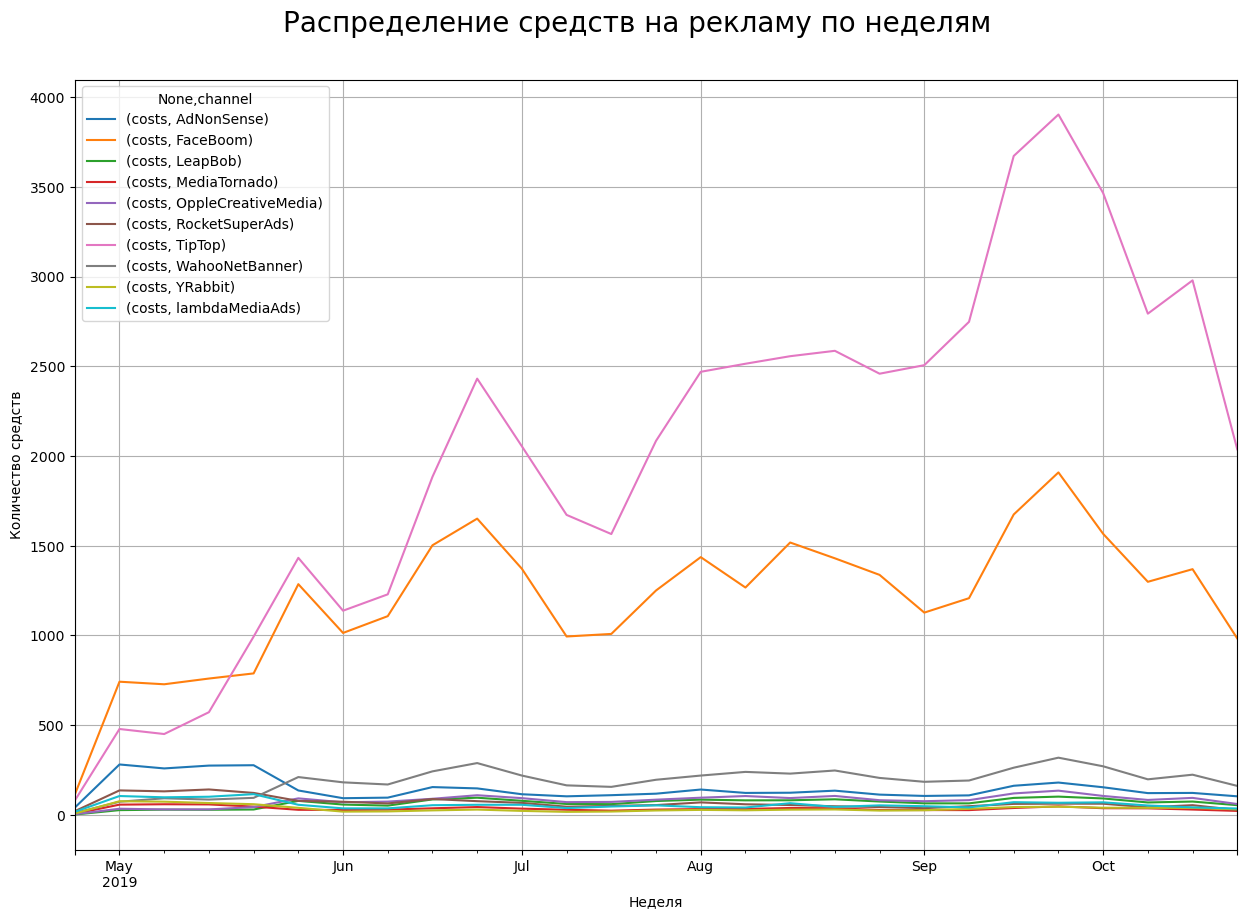

In [29]:
costs.groupby(by=['week', 'channel']).agg('sum').unstack().plot(figsize=(15,10), grid=True)
plt.suptitle('Распределение средств на рекламу по неделям',
             y = 0.95,
             fontsize = 20)
plt.xlabel('Неделя')
plt.ylabel('Количество средств')
plt.show()

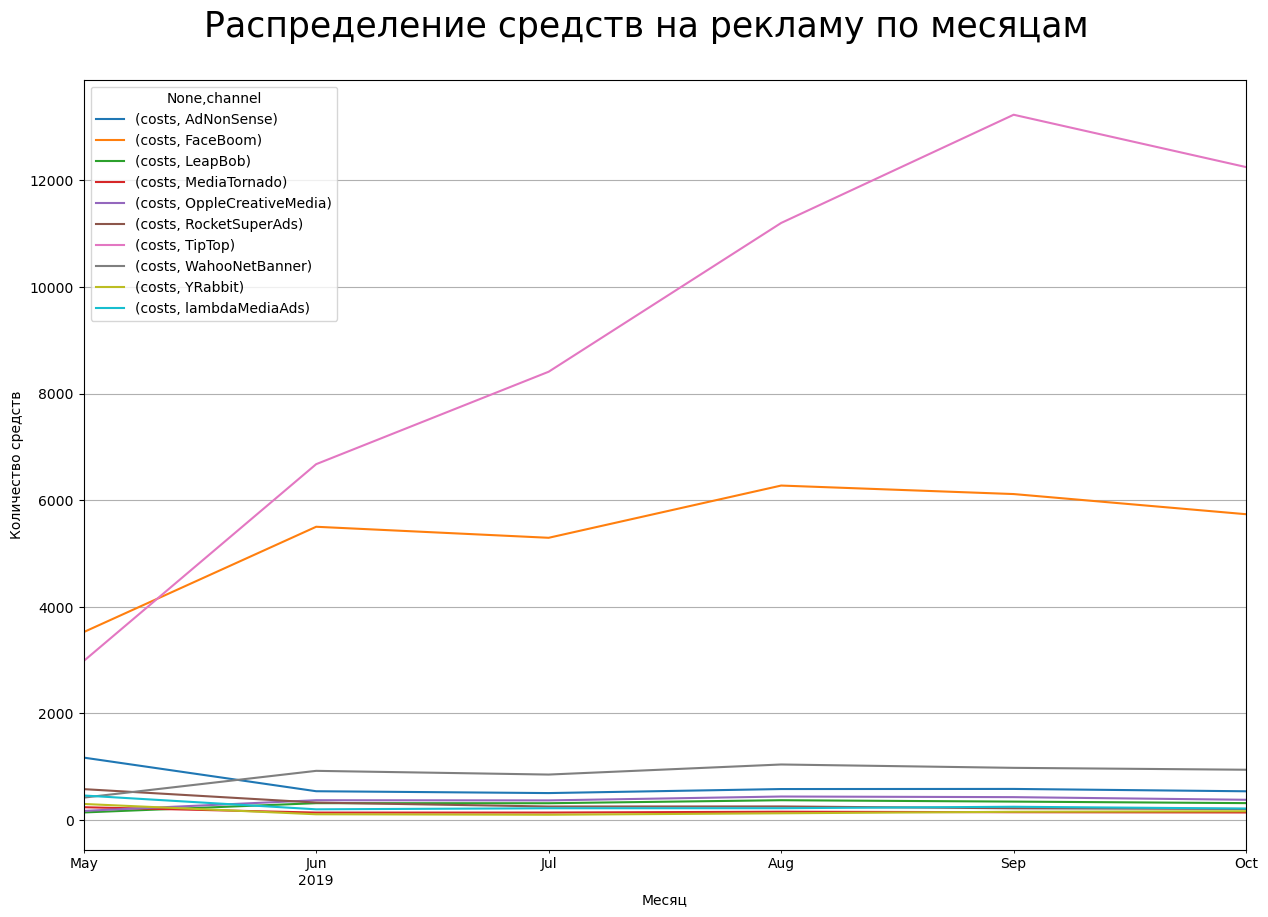

In [30]:
costs.groupby(by=['month', 'channel']).agg('sum').unstack().plot(figsize=(15,10), grid=True)
plt.suptitle('Распределение средств на рекламу по месяцам',
             y = 0.95,
             fontsize = 25)
plt.xlabel('Месяц')
plt.ylabel('Количество средств')
plt.show()

На данных двух графиках также видно, как выделяются `TipTop` и `FaceBoom`. На распределении по неделям можно заметить, что у данных источников увеличение и снижение затрат практически всегда происходит одновременно. Также можно увидеть, как в начале начали расти затраты в `AdNonSense`, но позже их урезали, примерно в тот же момент вложились в рекламу `WahooNetBanner` и поддерживали инвестирование примерно на одном уровне на протяжении всего периода.

### Стоимость привлечения одного пользователя

In [31]:
cac = (profiles.groupby('channel').agg({'user_id': 'count', 'acquisition_cost': 'sum'}))
cac['cac'] = (cac['acquisition_cost'] / cac['user_id']).round(2)
display(cac.sort_values(by='cac', ascending=False))
print('Средняя стоимость привлечения', (cac['acquisition_cost'].sum()/cac['user_id'].sum()).round(2))

,user_id,acquisition_cost,cac
channel,,,
TipTop,19561,54751.30,2.80
FaceBoom,29144,32445.60,1.11
AdNonSense,3880,3911.25,1.01
lambdaMediaAds,2149,1557.60,0.72
WahooNetBanner,8553,5151.00,0.60
RocketSuperAds,4448,1833.00,0.41
OppleCreativeMedia,8605,2151.25,0.25
MediaTornado,4364,954.48,0.22
YRabbit,4312,944.22,0.22


Средняя стоимость привлечения 0.7


Дороже всего привлечение пользователей обходится по каналу `TipTop`, привлечение одного человека стоит 2,80. Дешевле же всего обходится привлечение через канал `LeapBob`, стоимость за человека составляет 0,21. Средняя стоимость привлечения по всем каналам составляет около 1,13.

### Вывод

Основными каналами привлечения, на которые затрачивается суммарно более 80%, это `TipTop` и `FaceBoom`.

Наиболее дорогостоящим каналом привлечения пользователей является TipTop, однако количество и доля платящих пользователей, приходящих с этого источника, не так высоки. Это можно объяснить молодой аудиторией TipTop'a и, соответственно, не очень высокой их платежеспособностью.

[Начало страницы](#Исследование-рекламных-показателей-приложения-Procrastinate-Pro+)

## Оценка окупаемости рекламы

### Общая окупаемость

Проанализируем общую окупаемость всей рекламы с помощью графиков LTV и ROI, а также графики динамики LTV, CAC и ROI. Для начала удалим все строки с органическими пользователями, поскольку на их привлечение не требовались затраты.

In [32]:
profiles = profiles.query('channel != "organic"')
observation_date = datetime(2019, 11, 1).date()  # момент анализа
horizon_days = 14  # горизонт анализа 

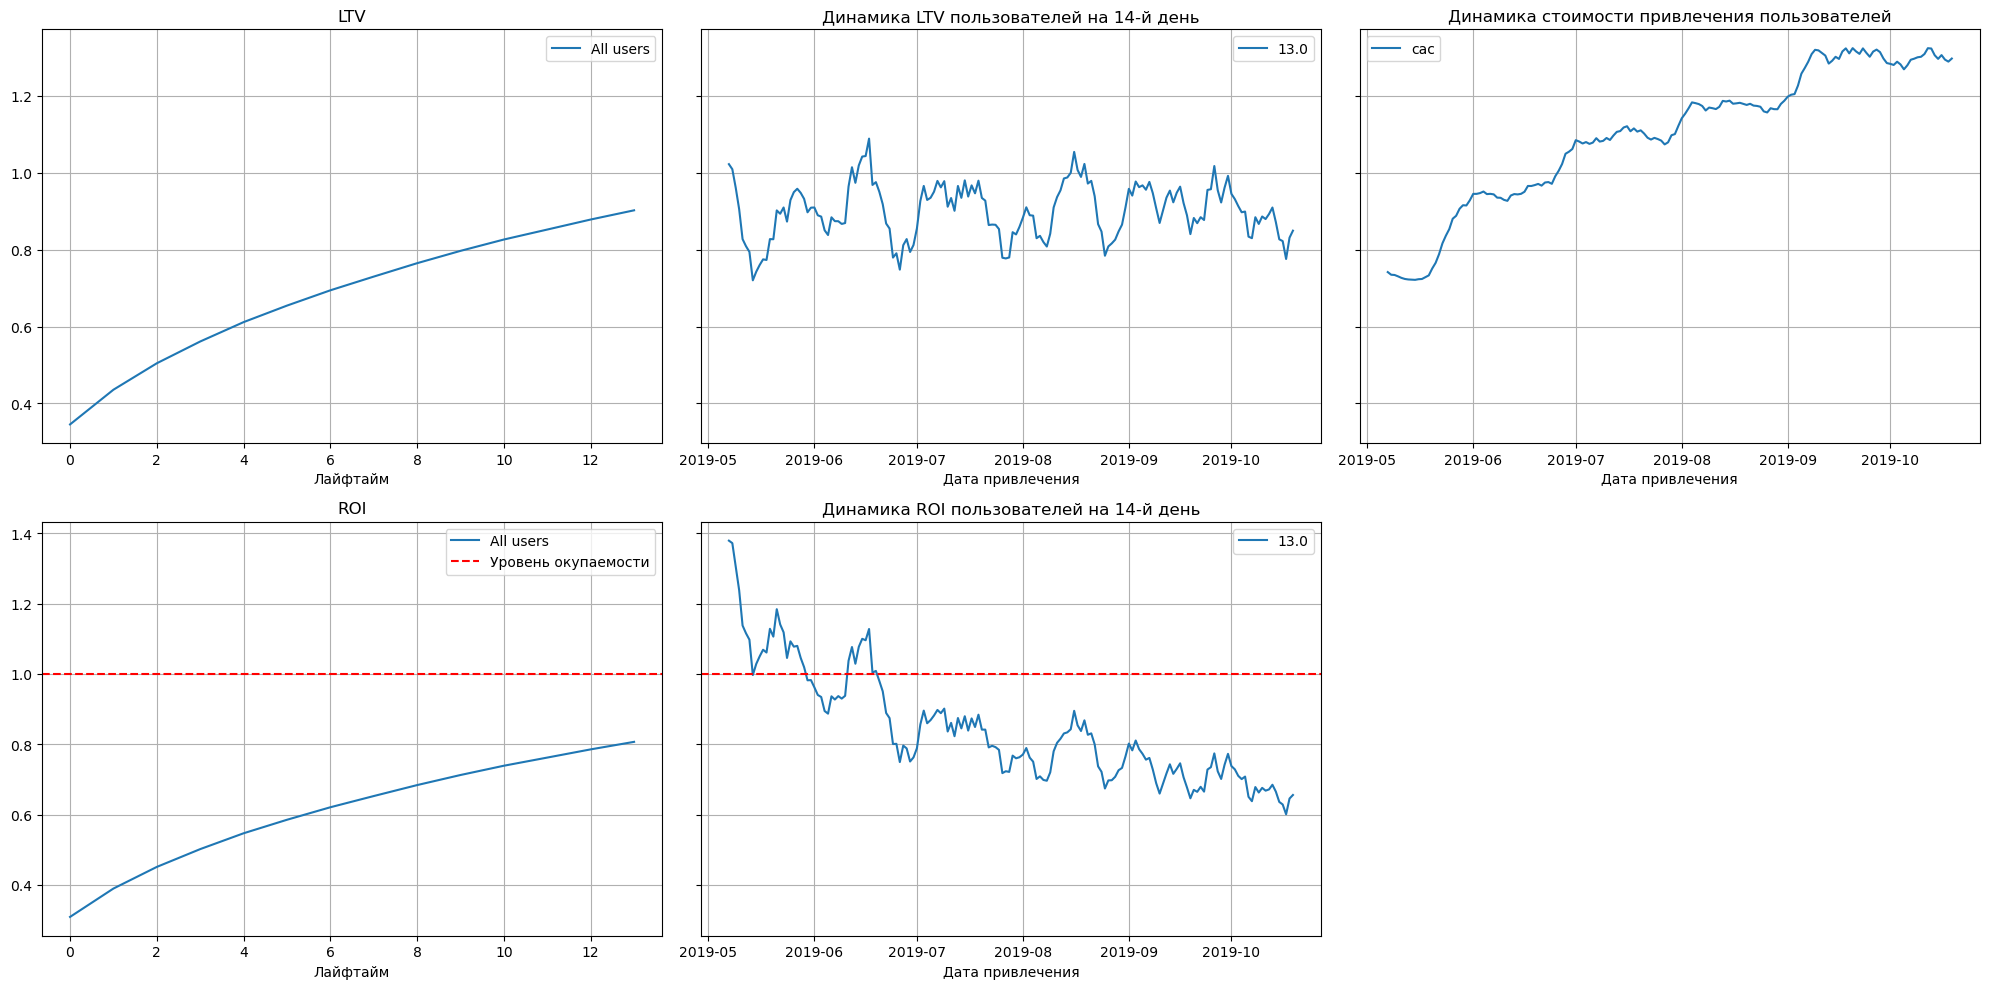

In [33]:
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(profiles, orders, observation_date, horizon_days)

plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days) 

По графику видно, что `LTV`, несмотря на колебания, остается примерно в одном диапозоне от 0.8 до 1.0, то есть данный показатель достаточно стабилен. По графику `CAC` видно, что стоимость привлечения пользователей начала резко расти, примерно в тот же момент начала падать окупаемость рекламы. Вероятно, были резко увеличены затраты на эту рекламу. На графике `ROI` видно, что реклама не окупается.

### Удержание и конверсия

Изучим графики удержания и конверсии по всем пользователям.

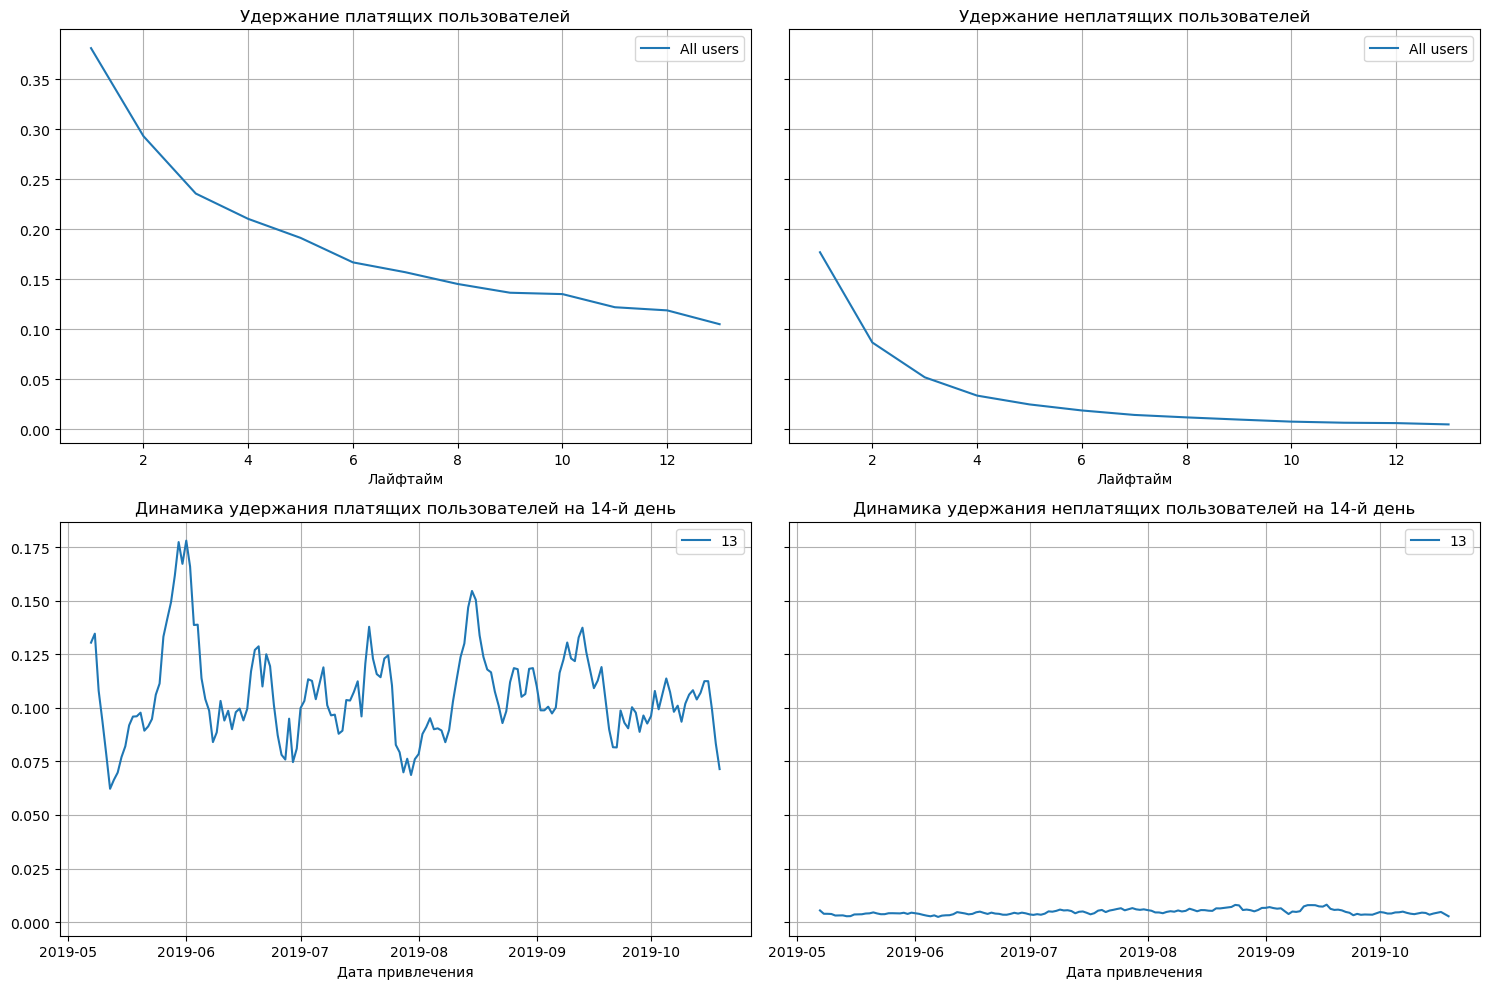

In [34]:
retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, ignore_horizon=False)

plot_retention(retention_grouped, retention_history, horizon_days)

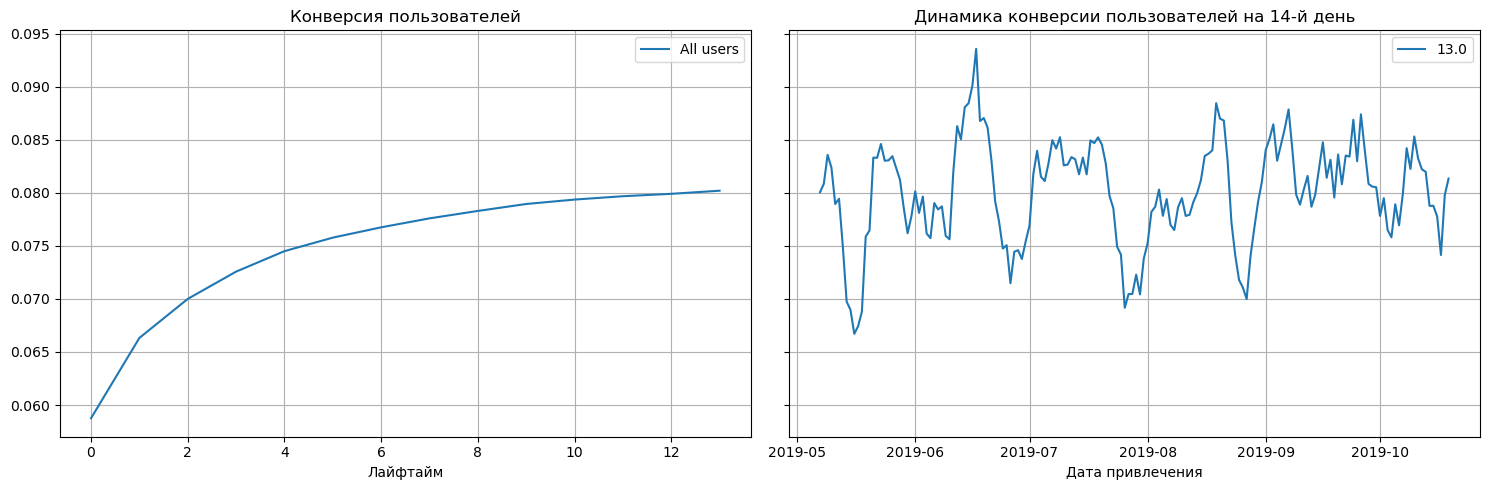

In [35]:
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

Удержание платящих пользователей, как и должно быть, выше, чем удержание неплатящих. Удержание в динамике также достаточно стабильно, удержание неплатящих близится к нулю, удержание платящих колеблется, но остается в одном диапозоне и не имеет тенденции к снижению.

Конвертируются пользователи также вполне стабильно.

### Окупаемость с разбивкой по устройствам

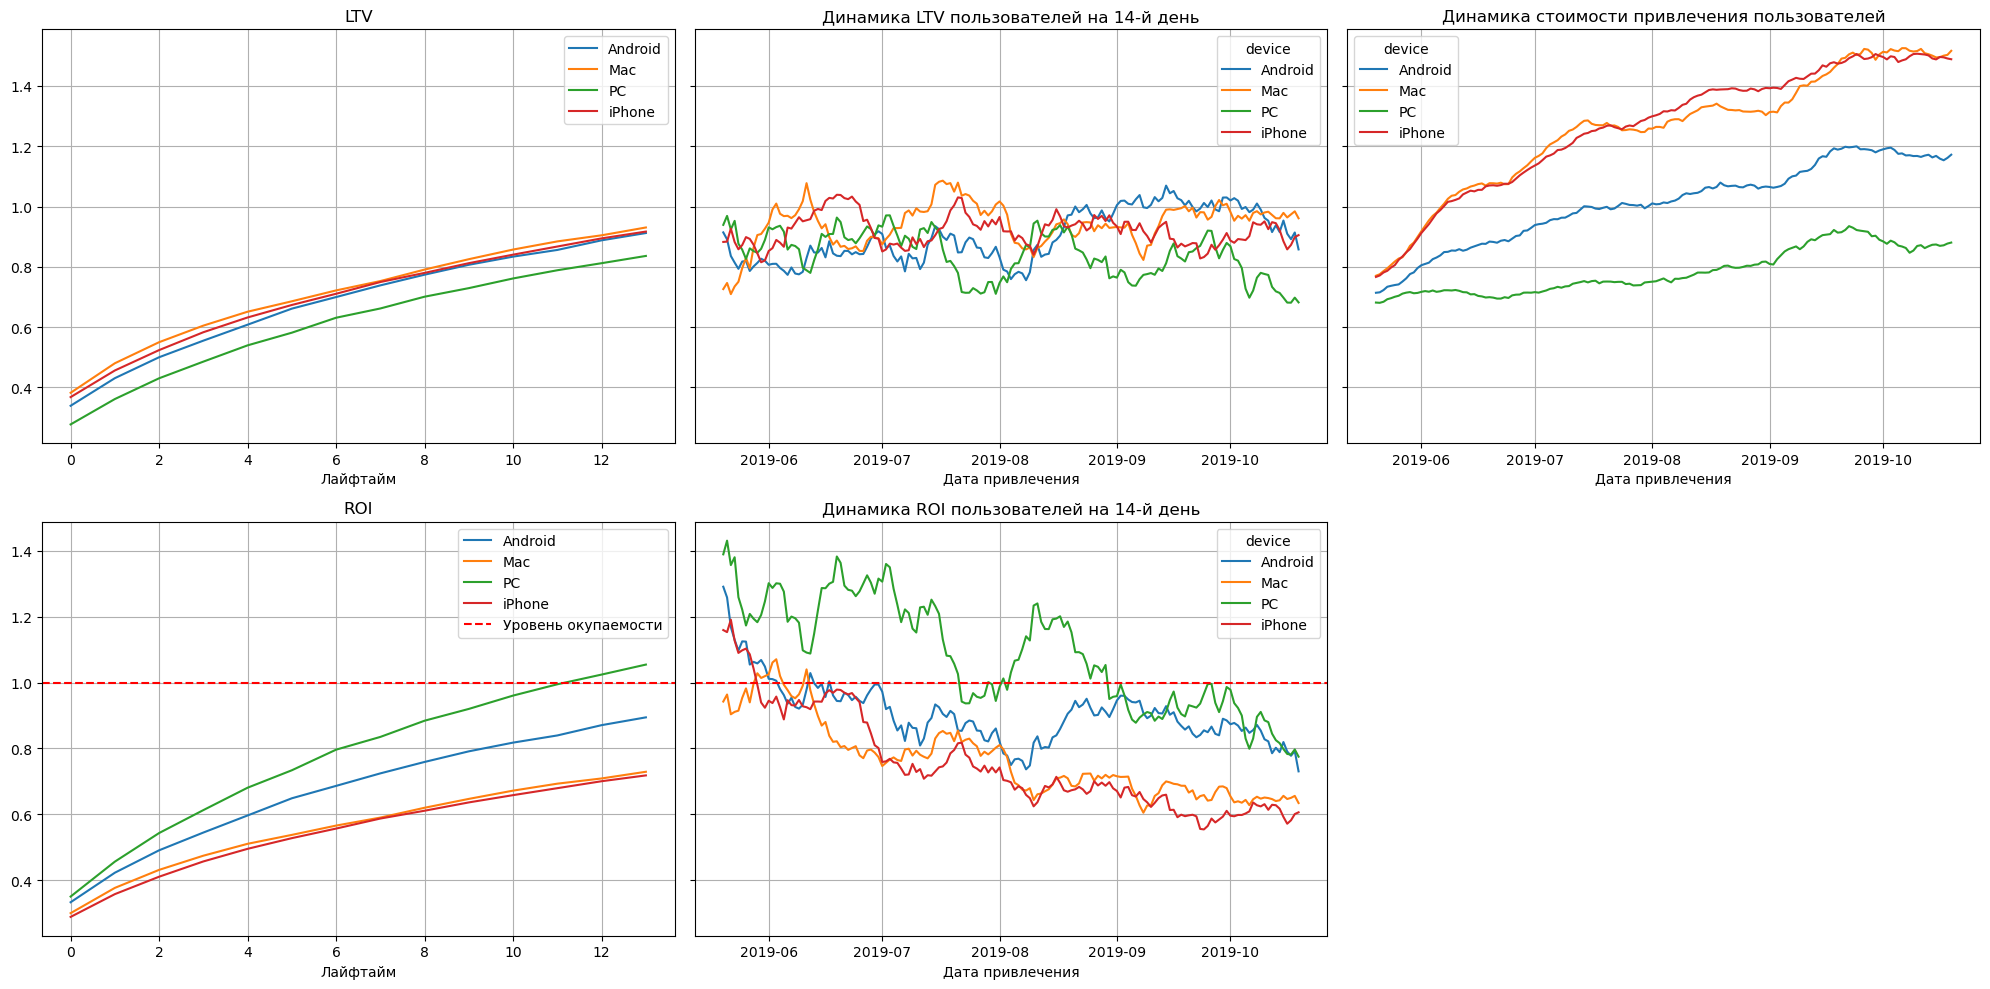

In [36]:
dimensions = ['device']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=20) 

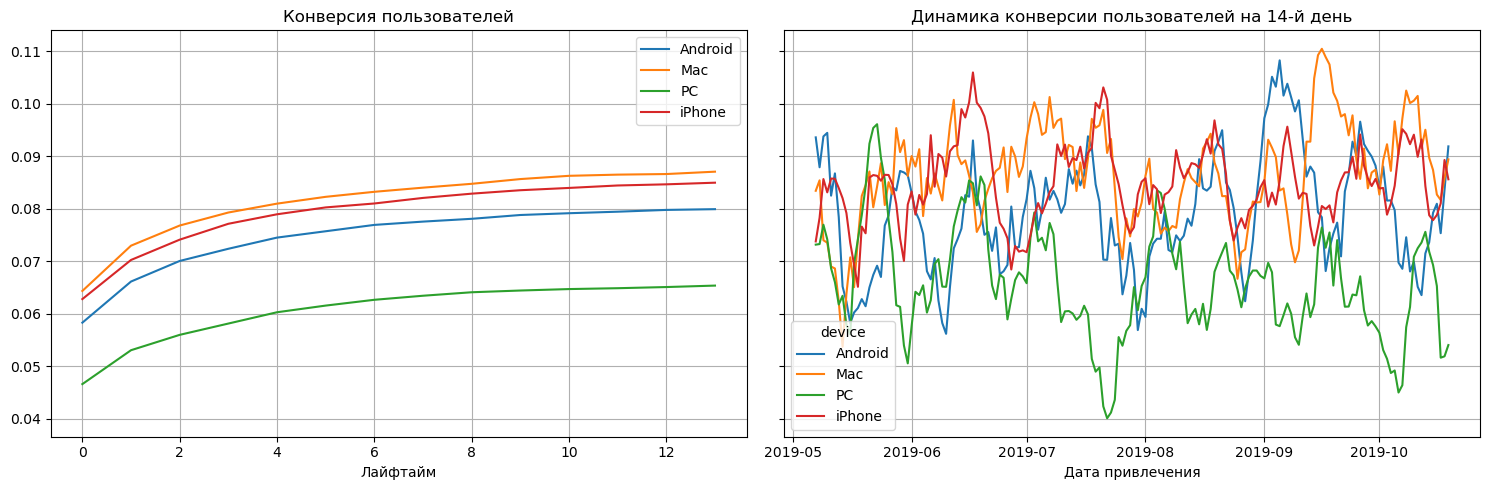

In [37]:
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

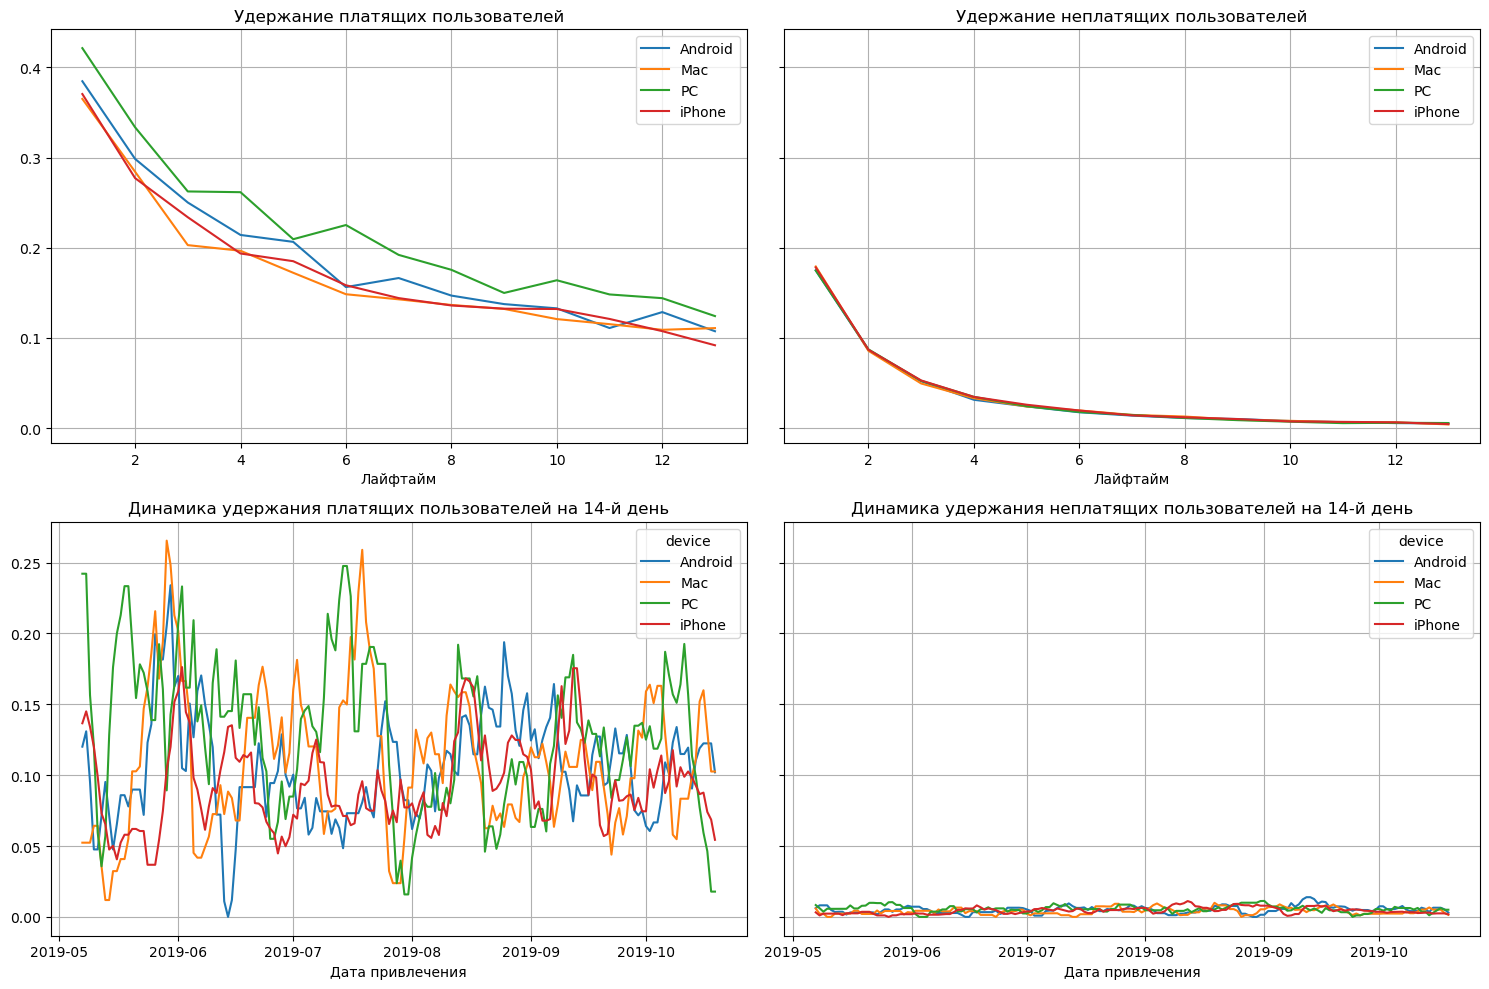

In [38]:
retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days) 

`LTV` по всем устройствам находится примерно на одном уровне за исключением пк-польвателей, на графике они находятся чуть ниже остальных, платящие пользователи заходят с этого устройства реже остальных.

По `CAC` видно, что "дороже всего" для привлечения стоят пользователи `Mac` и `iPhone`, затем идут пользователи `Android` и на последнем месте `PC`.

Вероятно из-за низкой стоимости привлечения последних, получилось полностью окупиться только по привлечению пользователей, использующих `PC`, окупаемость по устройствам `Android` достигла около 90%, `Mac` и `iPhone` - около 72-73%.

Также у пользователей `PC` слабая конверсия, но хорошее удержание платящих пользователей. Удержание неплатящих пользователей одинаково падает по всем стройствам.

### Окупаемость с разбивкой по регионам

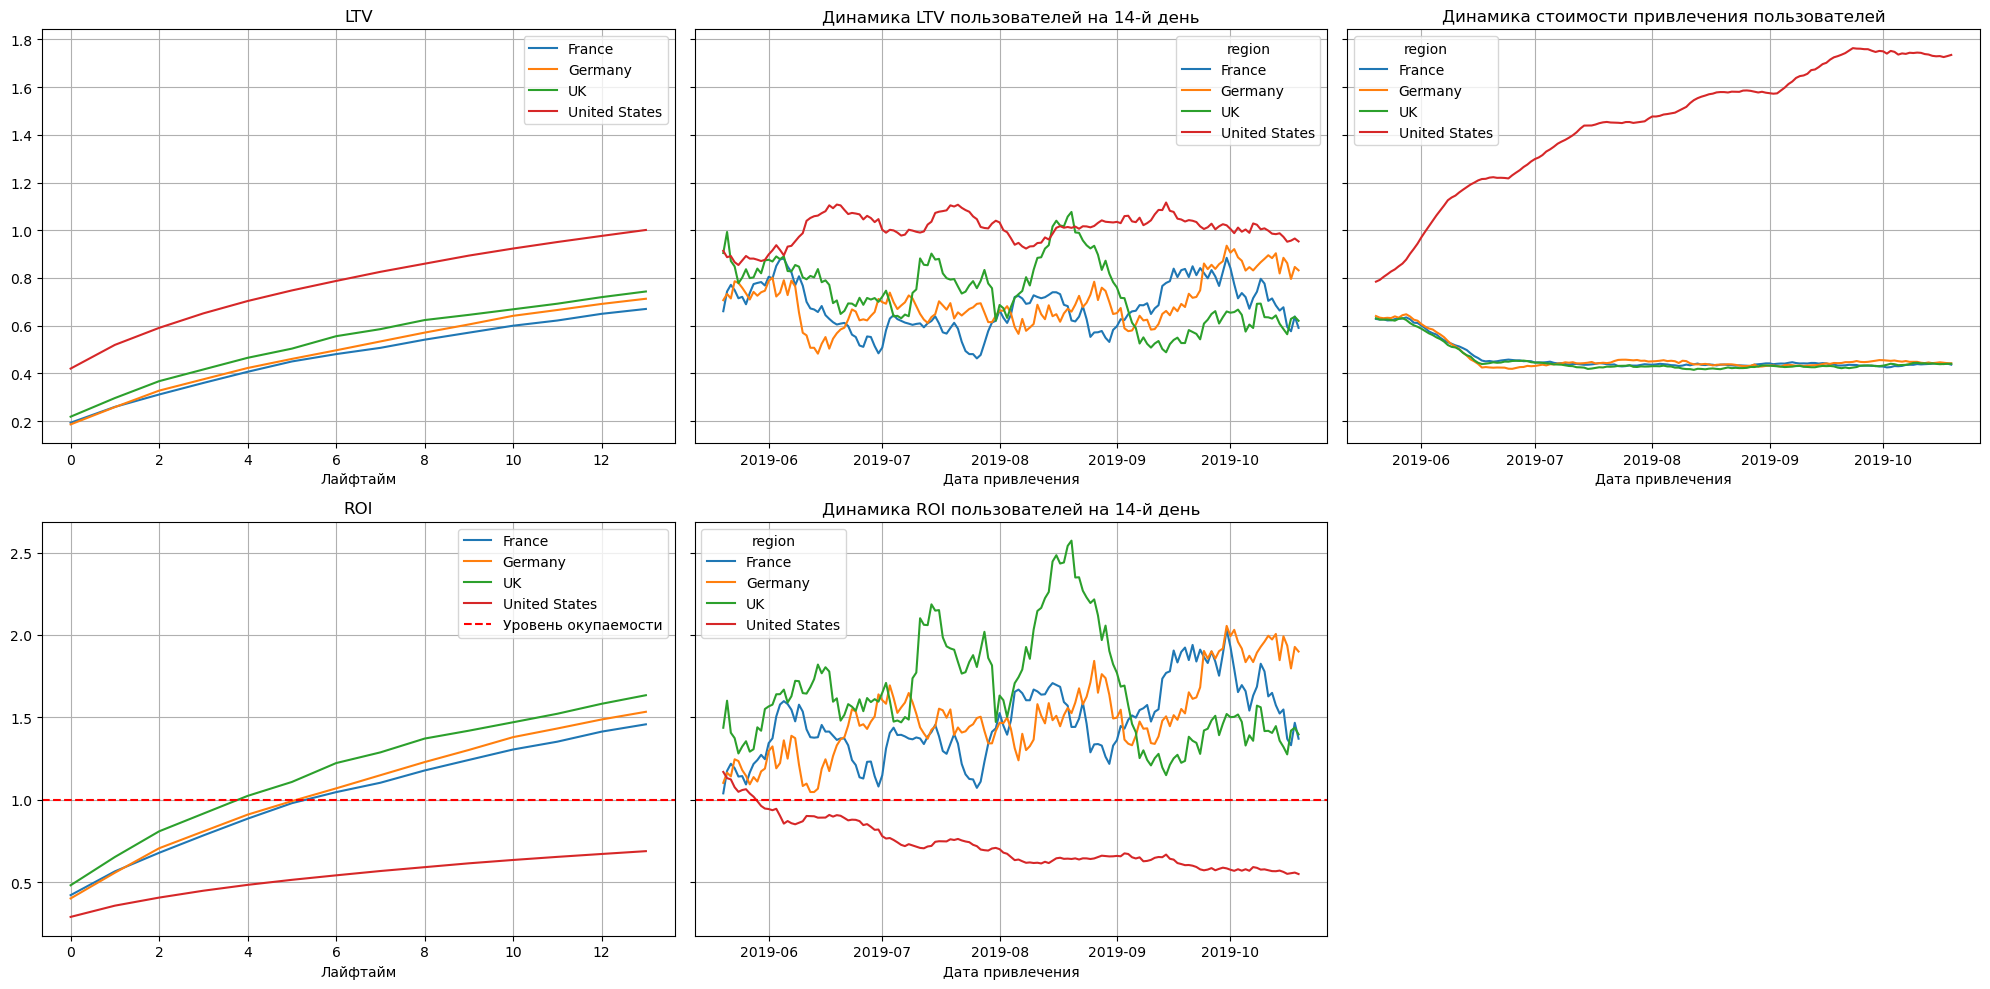

In [39]:
dimensions = ['region']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=20) 

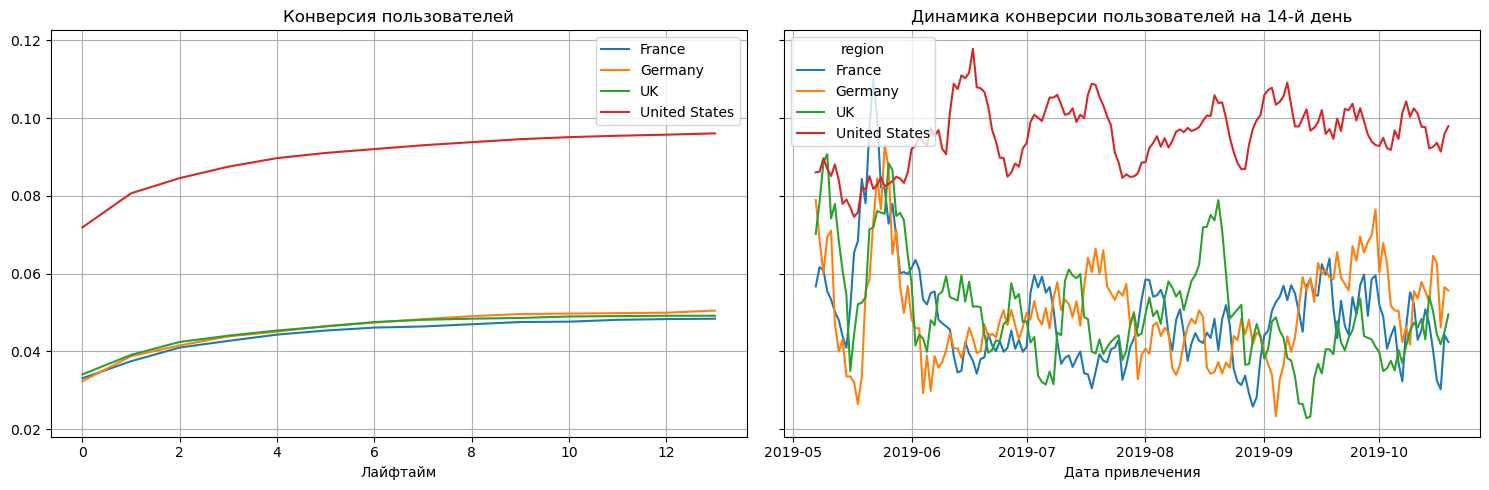

In [40]:
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

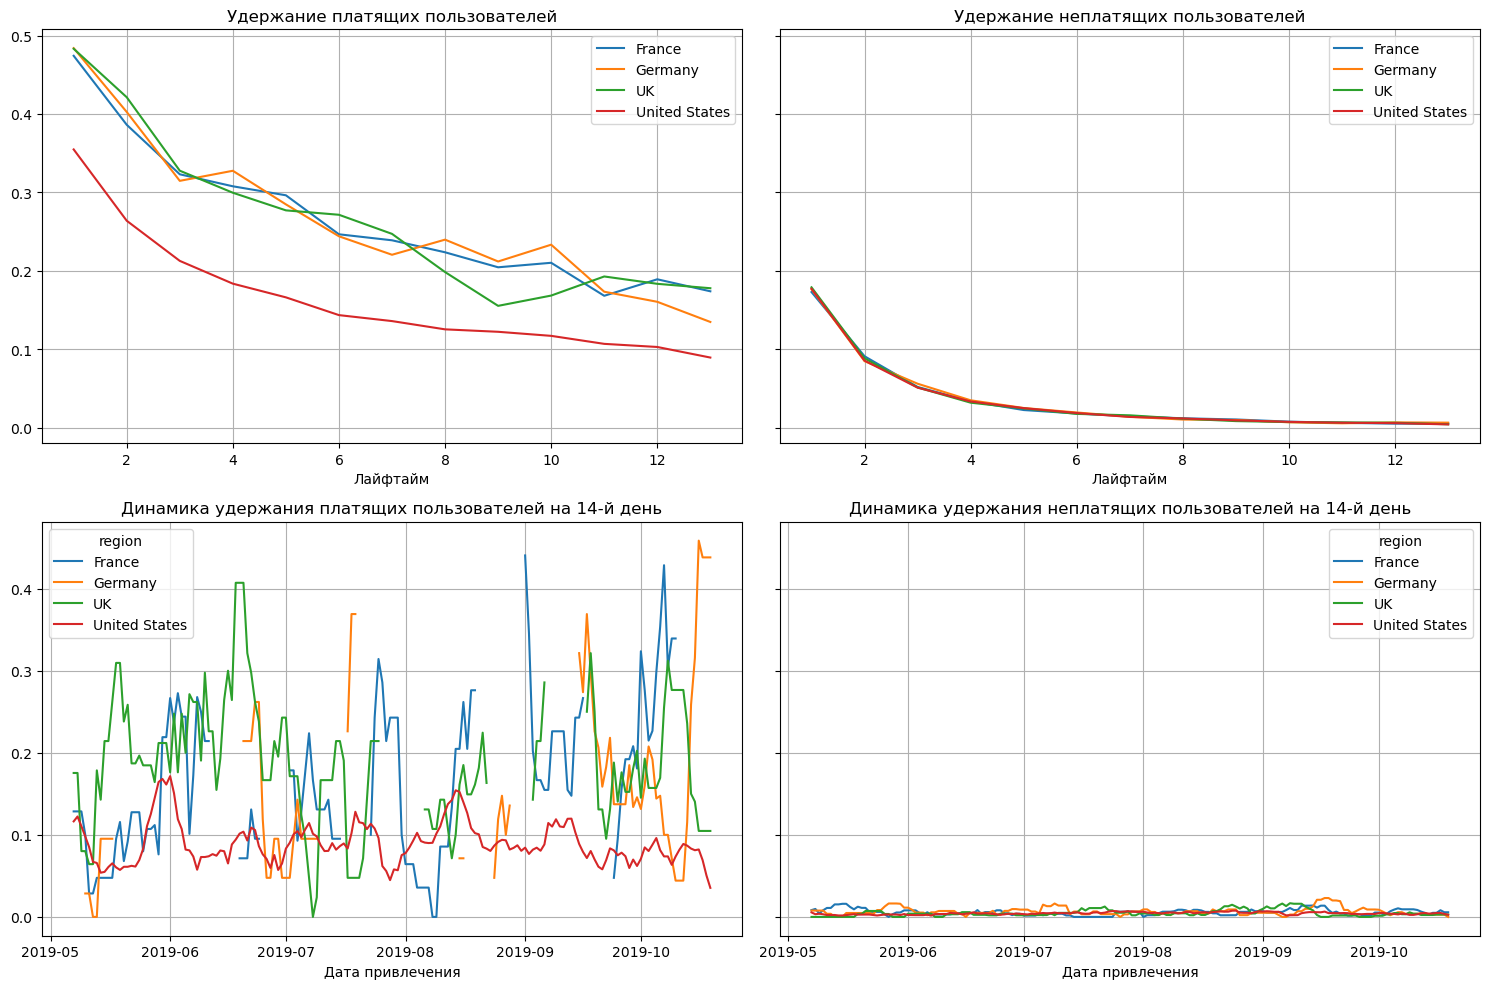

In [41]:
retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days) 

На данных графиках заметно аномальное поведение пользователей из США. Чаще других стран они являются платными, но также стоимость их привлечения является самой высокой среди остальных. Очевидно, реклама для этой страны не окупается. На графике видно, как после аномального увеличения стоимости привлечения пользователей в Июне, `ROI` упала за уровень окупаемости рекламы.

Быстрее всех окупилась реклама для пользователей их Англии. Также у нее хороший показательно `LTV`, она находится на втором месте после США.

По графикам видно, что конверсия у США довольно высокая, на при этом самое низкое удержание, среди остальных стран. Вероятно, в приложении присутствуют технические проблемы. Конверсия и удержание всех остальных стран стабильно и держится в среднем на одном уровне.

### Окупаемость с разбивкой по каналу привлечения

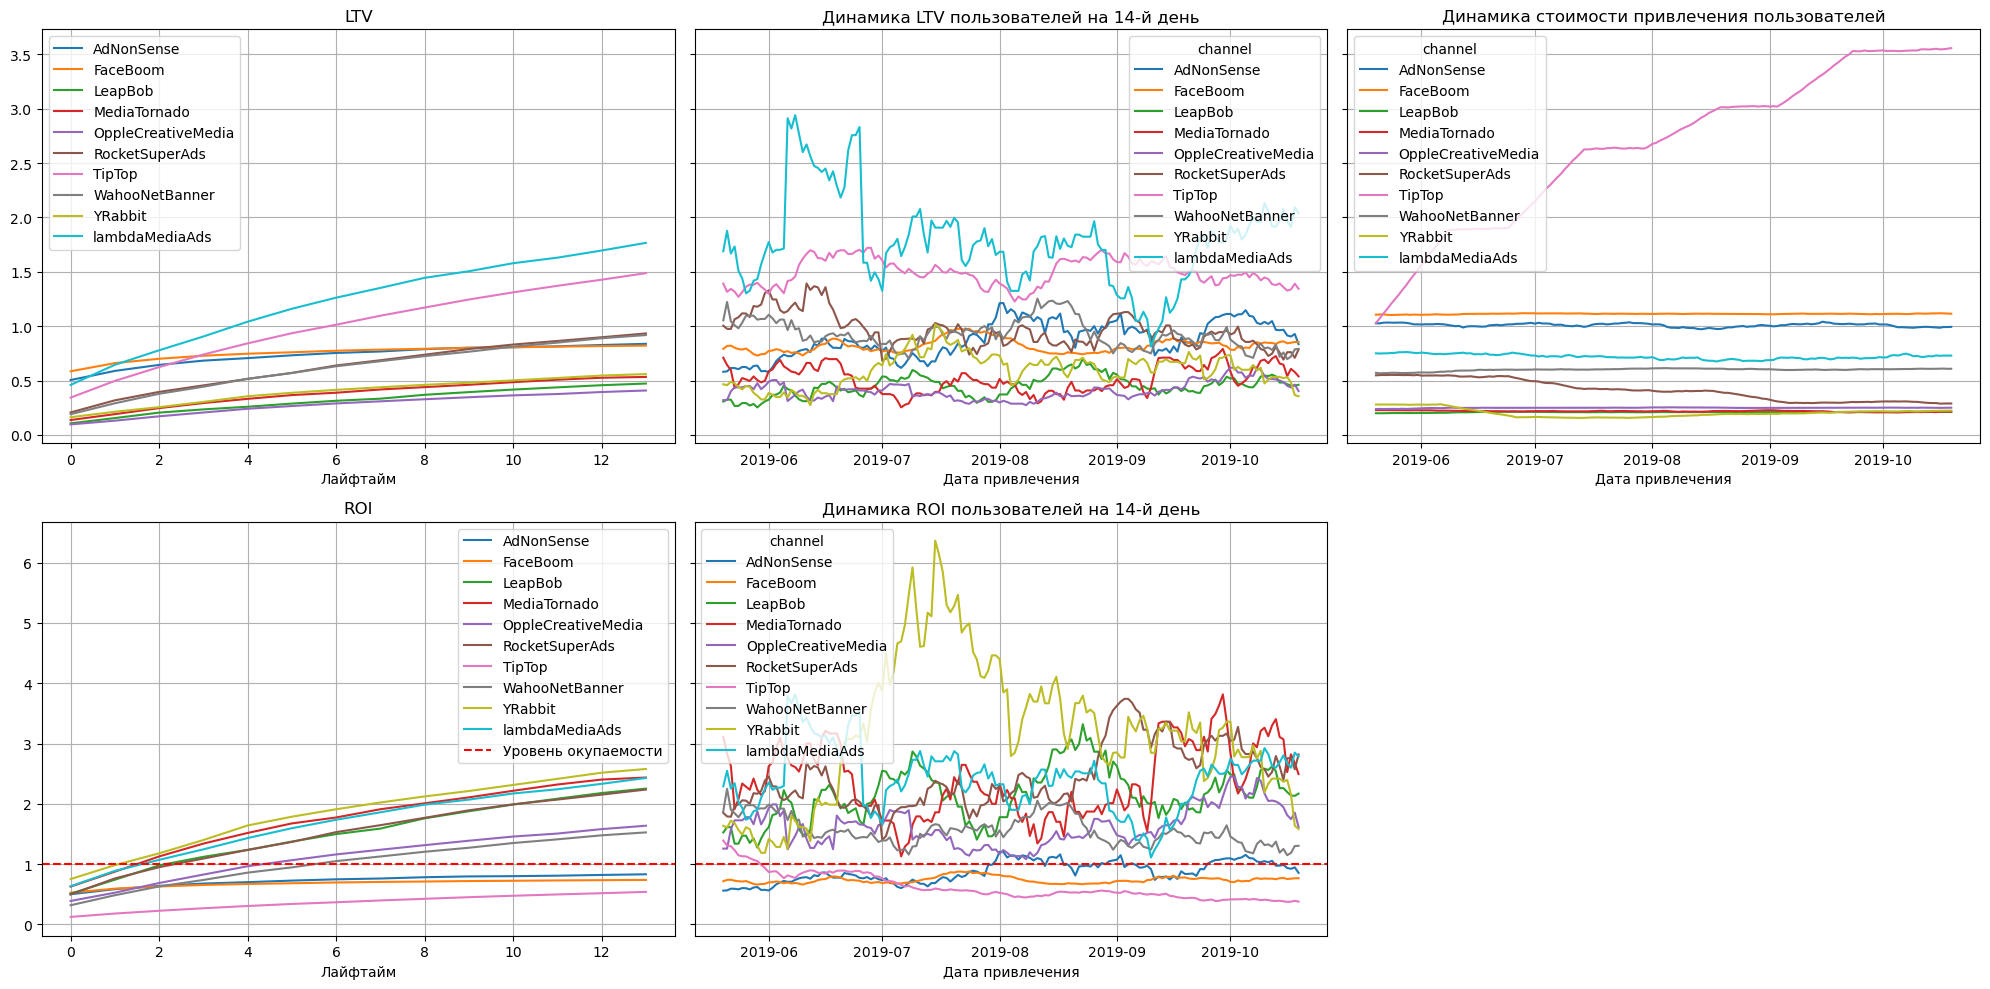

In [42]:
dimensions = ['channel']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=20
) 

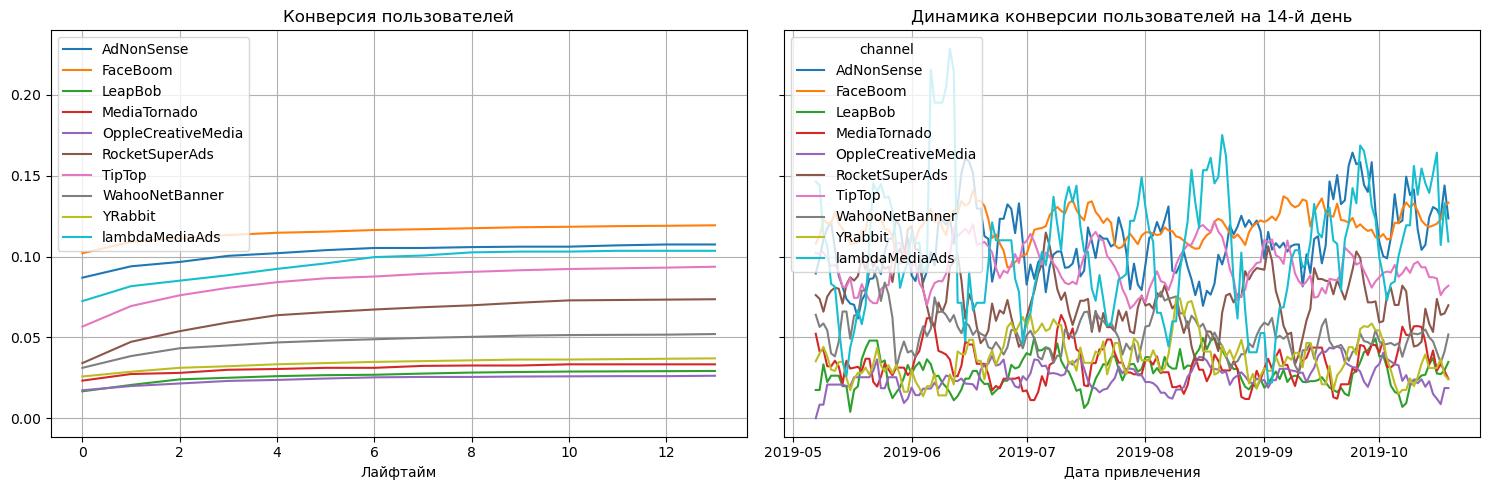

In [43]:
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

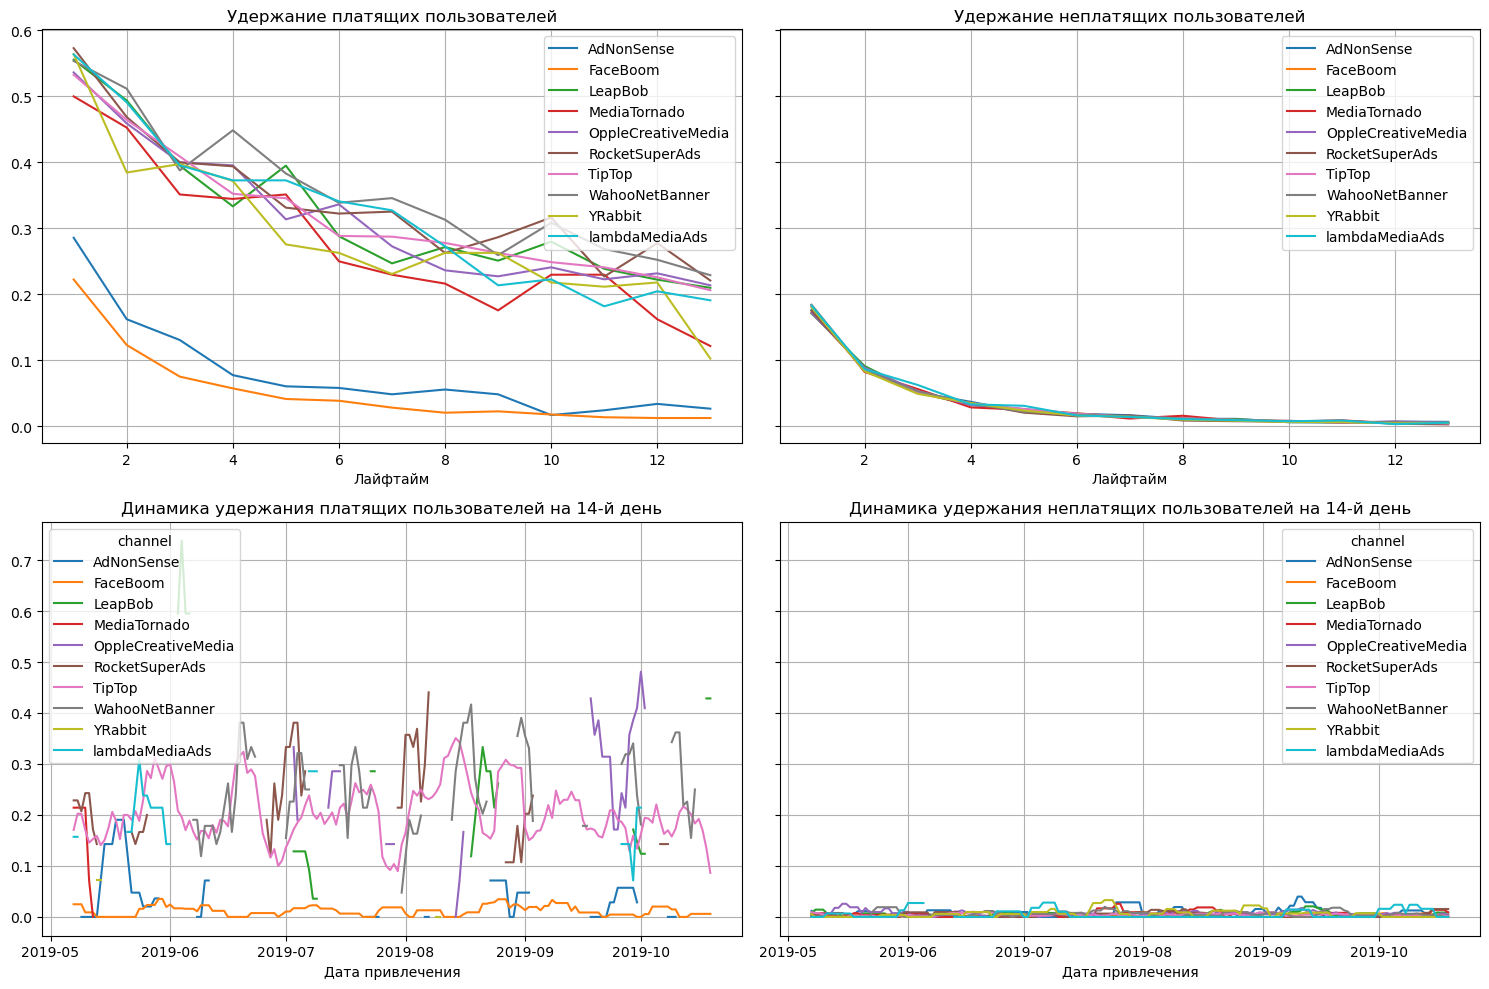

In [44]:
retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days) 

Самые большие показатели `LTV` у источников `lambdaMediaAds` и `TipTop`, однако у последней замечен резкий аномальный рост стоимости привлечения пользователей, из-за чего в том числе не окупается реклама. Также реклама не окупается у источников `lambdaMediaAds` и `FaceBoom`. Быстрее всего окупается источник `YRabbit`.

На графике удержания заметен довольно плохой результат по каналам `AdNonSense` и `FaceBoom`, но при этом пользователи, пришедшие из этих каналов конвертируются неплохо. По всем остальным каналам картина особо не меняется.

### Вывод

Изучив графики, можно сделать вывод о том, что средняя окупаемость рекламы к концу второй недели составила 80%, то есть реклама не окупается. Негативное влияние на окупаемость могут оказывать устройства  `Mac` и `iPhone`, поскольку на данные девайсы очень высокая стоимость привлечения клиентов. Также не окупается реклама, направленная на граждан США. Несмотря на хорошую конверсию, пользователи не задерживаются надолго в приложении.

Проблемы в окупаемости могут быть вызваны разными причинами, возможно в приложении присутствует техническая ошибка, которая, к примеру, не дает пользователю продлить подписку или оплатить другую опцию. Также может влиять некорректное распределение рекламного бюджета. Помимо удержания старых, привычных пользователей, стоит расширять ауд



На это может влиять завышенная стоимость привлечения пользователей `Mac` и `iPhone`, пользователей из США или слишком большие затраты на определенные рекламные источники, которые себя не оправдывают.

[Начало страницы](#Исследование-рекламных-показателей-приложения-Procrastinate-Pro+)

## Общие выводы и рекомендации

**Причины неэффективности привлечения пользователей**

Причин плохой окупаемости рекламы в данном ислледовании несколько.

Пользователи используют всего 4 устройства, `Mac`, `iPhone`, `Android` и `PC`, окупается реклама только среди пк-юзеров, привлечение пользователей `Mac` и `iPhone` и вовсе слишком затратное по отношению с остальными, при этим удерживаются они чуть хуже других.

Также в датафреймах представлены данные о пользователях из США, Англии, Германии и Франции. Стоимось привлечения пользователей из США аномально высокая, как следствие, это единственная страна, реклама в которой не окупается. Конверсия у США довольно неплохая, при не очень хорошем удержании платных пользователей. Вероятно, причина может скрываться в технической ошибке приложения.

С каналами привлечения тоже не все чисто. Стоимость привлечения пользователей через канал `TipTop` аномально выросла и продолжает расти, при этом конверсия и удержание по этому каналу не выделяется на фоне остальных, так что вложение таких средств не стоит такого результата. Реклама через каналы `LeapBop`, `FaceBoom` и `TipTop` совсем не окупается. Достаточно хорошо себя показал `lambdaMediaAds` по всем показателям. Самый высокий показатель `LTV` по сравнению с остальными, а также в тройке лидерв по  `ROI`, канал довольно быстро окупается. Конверсия и удержания ведут себя стабильно, а стоимость прилечения не слишком высокая.

Хуже всех по удержанию себя показали `FaceBoom` и `AdNonSense`, наряду с `TipTop` они не смогли окупить рекламу.


**Рекомендации для отдела маркетинга**

* Несмотря на то, что показатели США оказались не очень положительными, можно сказать, это основной рынок для данного приложения (количество пользователей из США 66%). В связи с этим необходимо проверить, нет ли в приложении технических ошибок, с которыми могут сталкиваться юзеры из этой страны, ведь высокая конверсия и низкое удержвание выглядит довольно подозрительно.

* Другие страны, Германия, Англия и Франция, показали себя в среднем одинаково хорошо, у них стабильные показатели, невысокая стоимость привлечения людей, достаточно быстрая окупаемость. Есть весомый повод расширять рынок для польователей из этих стран.

* Следует обратить внимание и привлечь количество пк-пользователей на рынке. Несмотря на невысокую, относительно остальных, конверсию, у них хороший показатель удержания и окупаемости, в данном случае они единственные окупаются.

* Ввиду крайне высокой стоимости привлечения пользователей, но при этом средние показатели по конверсии и удержании пользователей, а также отсутствие окупаемости рекламы, стоит задуматься о сокращении бюджета для канала `TipTop`. Затраты на этот канал абсолютно не оправдывают себя, имеет смысл присмотреться к более дешевым, но достаточно результативным каналам.

* Хорошие результаты показал `lambdaMediaAds`. Стабильная, невысокая стоимость привлечения, высокая "пожизненная ценность" пользователей, быстрая окупаемость, хорошее удержание и конверсия. Можно рассмотреть данный источник для более объемных инвестиций в рекламу.

[Начало страницы](#Исследование-рекламных-показателей-приложения-Procrastinate-Pro+)